In [1]:
# RRT Implemented from JGoppert bswarm Repository

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x0: [0.05 0.05], xf: [0.95 0.95]


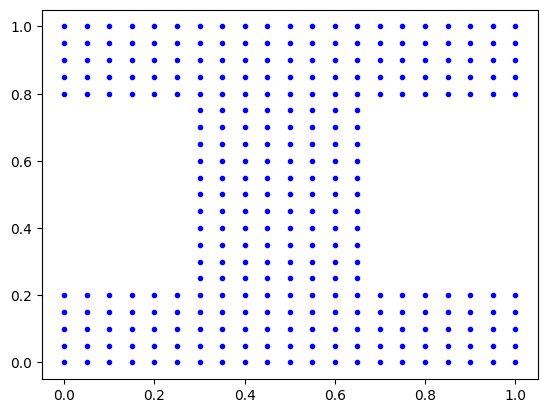

In [6]:
# Build Valid Movement Masking Map
# Implemented from Game Theory example
# n indicates number of grid cells for n x n grid
# Meshgrid X, Y created for n^2 number of cells with x, y values of 0 to xf, yf
n = 21
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
X,Y = np.meshgrid(x, y)

# Position function converting position index i_x to position x
def position(i_x):
    return np.array([x[i_x[0]], y[i_x[1]]])

# Define Initial, Final position of the aggressor
# Position index of aggressor
i_x0 = (int(0.05*n), int(0.05*n))
i_xf = (int(0.95*n), int(0.95*n))
# Position of aggressor
x0 = position(i_x0)
xf = position(i_xf)
print("x0: {}, xf: {}".format(x0, xf))

# Building Setup
# Set nB number of buildings
# building_i indicates 4 corners of the building generated in the field
nB = 2
building1 = np.array([0, 0.3, 0.25, 0.75])
building2 = np.array([0.7, 1, 0.25, 0.75])
building = [building1, building2]

# Bound within map
def bound(i_x):
    return (i_x[0] >= 0 and i_x[0]<n and i_x[1] >= 0 and i_x[1]<n)

def bound_building(i_x, building):
    # building: [x0, x1, y0, y1]
    currpos = position(i_x)
    bcheck = np.zeros((nB,1))
    for b in range(nB):
        bnow = building[b]
        bcheck[b] = (currpos[0] >= bnow[0] and currpos[0] <= bnow[1] and currpos[1] >= bnow[2] and currpos[1] <= bnow[3])
    sumcheck = 0
    for b in range(nB):
        sumcheck += bcheck[b]
    return sumcheck


def static_movement_map(X, Y, building):
    # Static Movement Map
    nH = len(X)
    nV = len(X[0])
    
    # For (x, y) coordinate, check if this is within the field bound while outside of building bound
    static_map = np.zeros((nH, nV))
    for i in range(len(X)):
        for j in range(len(Y)):
            # Check if the (i,j) is within field bound
            within_bound = bound((i, j))
            # check if the (i,j) is outside building bound
            within_building = bound_building((i,j), building)
            
            # If we are within_bound but not in building >> True
            # else >> False
            static_map[i,j] = within_bound and not within_building
    return static_map

static_map = static_movement_map(X, Y, building)

fig = plt.figure()
for i in range(len(X)):
    for j in range(len(Y)):
        if static_map[i,j] == True:
            plt.plot(X[j,i], Y[j,i], '.b')

max iterations exceeded


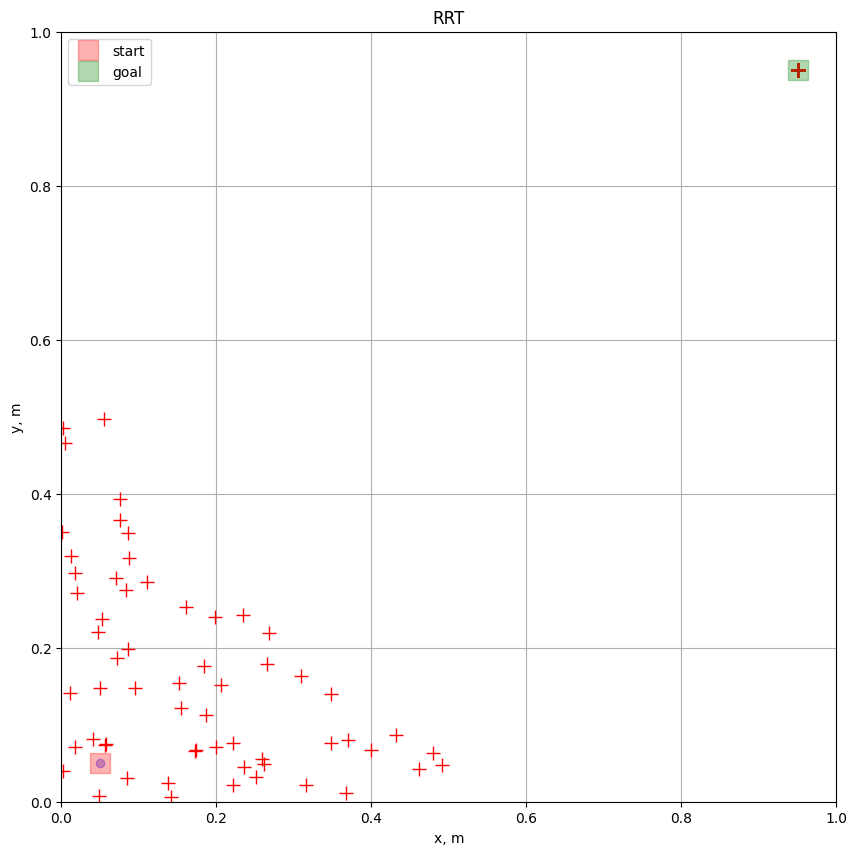

success False


In [11]:
import rrt

X_start = rrt.SE2_from_param([0, x0[0], x0[0]])
X_goal = rrt.SE2_from_param([0, xf[0], xf[1]])

# this is a list of all obstacles
# x, y, radius
collision_points = [
    [5, 0, 1],
    [2, 4, 1],
    [5, -5, 2],
    [10, 5, 3],
    [10, -5, 1],
]

ret = rrt.rrt(X_start=X_start, X_goal=X_goal, vehicle_radius=1,
        box=[0, 1, 0, 1], collision_points=[],
        plot=True, max_iterations=500, dist_plan=0.1, tolerance=0.5)
print('success', ret['success'])